### langgraph 기본 그래프 생성

1. State 정의
2. 노드 정의
3. 그래프 정의
4. 그래프 컴파일
5. 그래프 시각화

In [1]:
pip install langgraph

     -------------------------------------- 152.4/152.4 kB 9.5 MB/s eta 0:00:00
     -------------------------------------- 438.5/438.5 kB 9.1 MB/s eta 0:00:00
     -------------------------------------- 444.2/444.2 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 50.0/50.0 kB ? eta 0:00:00
     ---------------------------------------- 44.2/44.2 kB ? eta 0:00:00
     ------------------------------------- 362.0/362.0 kB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     -------------------------------------- 121.2/121.2 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 73.5/73.5 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 134.6/134.6 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 78.8/78.8 kB 4.6 MB/s e

In [2]:
pip install langchain_teddynote

     ---------------------------------------- 50.6/50.6 kB ? eta 0:00:00
     ---------------------------------------- 114.6/114.6 kB ? eta 0:00:00
     ------------------------------------- 725.5/725.5 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 43.7/43.7 kB ? eta 0:00:00
     -------------------------------------- 286.3/286.3 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 81.3/81.3 kB ? eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 12.8 MB/s eta 0:00:00
     -------------------------------------- 207.5/207.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 35.5/35.5 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.21.0 requires protobuf<4,>=3.12, but you have protobuf 5.29.5 which is incompatible.


In [3]:
# State정의(아래는 형태를 적어놓았을뿐 실제값이나 변수를 입력하여 작성한것은 아님)

from typing import TypedDict, Annotated, List
from langchain_core.documents import Document
import operator

class GraphState(TypedDict):
    context : Annotated[List[Document], operator.add]  # 리스트는 애드가 가능
    answer : Annotated[List[Document], operator.add]
    question : Annotated[str,"user question"]          # 문자열에는 애드가 안되니 그냥 정의문을 써둠둠
    sql_query : Annotated[str,"sql query"]
    binary_score : Annotated[str,"binary score yes or no"]

In [ ]:
# 노드정의(아래는 형태를 적어 놓았을뿐 실제값이나 변수를 입력하여 작서한것은 아님)
# 노드는 기본적으로 함수구조로 정의한다.

def retrive(state:GraphState) -> GraphState:
    # retrive : 검색 기능 노드
    documents = "검색된 문서"
    return {"context" : documents}   # 입력도 state고 출력도 state이지만 key/value형태로 해도 된다 사실상 같은거다

def rewrite_query(state:GraphState) -> GraphState:
    # Query Transform : 쿼리 재작성
    documents = "검색된 문서"
    return GraphState(context=documents) # 이렇게 반환을 하는것이 정석같은거니 이구조가 좋다

def llm_gpt_execute(state:GraphState) -> GraphState:
    # LLM 실행
    answer = "GPT 생성된 답변"
    return GraphState(answer=answer)

def relevance_check(state:GraphState) -> GraphState:
    # Relevance Check : 관련성 확인
    binary_score = "Relevance Score"
    return GraphState(binary_score=binary_score)

def sum_up(state:GraphState) -> GraphState:
    # sum_up : 결과 종합
    answer = "종합된 답변"
    return GraphState(answer=answer)

def search_on_web(state:GraphState) -> GraphState:
    # Search on web : 웹 검색
    documents = state["context"] = "기존문서"
    searched_documents = "검색된 문서"
    documents += searched_documents
    return GraphState(context=documents)

def get_table_info(state:GraphState) -> GraphState:
    # get table info : 테이블 정보 가져오기
    table_info = "테이블 정보"
    return GraphState(context=table_info)

def generate_sql_query(state : GraphState) -> GraphState:
    # Make SQL Query : SQL 쿼리 생성
    sql_query = "SQL 쿼리"
    return GraphState(sql_query=sql_query)

def execute_sql_query(state : GraphState) -> GraphState:
    # Execute SQL Query : SQL 쿼리 실행
    sql_result = "SQL 결과"
    return GraphState(context=sql_result)

def validate_sql_query(state : GraphState) -> GraphState:
    # Validate SQL Query : SQL 쿼리 검증
    binary_score = "SQL 쿼리 검증 결과"
    return GraphState(binary_score=binary_score)

def handle_error(stest:GraphState) -> GraphState:
    # Error handling : 에러처리
    error = "에러 발생"
    return GraphState(context=error)

def decision(state:GraphState) -> GraphState:
    # 의사결정
    decision = "결정"
    return decision

### 1. 가장간단한 구조인 conventional RAG

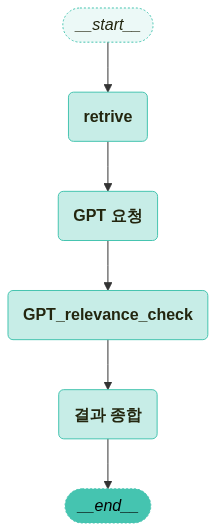

In [5]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_teddynote.graphs import visualize_graph

#langgraph.graph에서 StateGraph와 END를 가져옵니다.
workflow = StateGraph(GraphState)

# 노드를 추가 합니다.
workflow.add_node("retrive", retrive)
workflow.add_node("GPT 요청",llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("결과 종합", sum_up)

# 각 노드를 연결 합니다.
workflow.add_edge("retrive","GPT 요청")
workflow.add_edge("GPT 요청","GPT_relevance_check")
workflow.add_edge("GPT_relevance_check","결과 종합")
workflow.add_edge("결과 종합",END)

workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)

### 2. 1번의 기본 conventional RAG에 재검색 하는 로직 추가

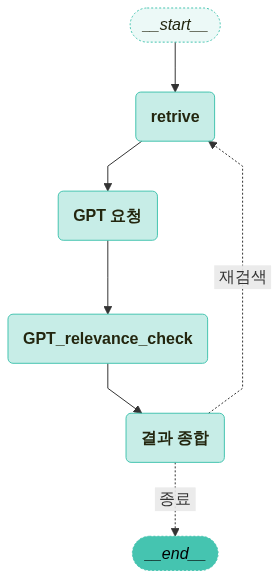

In [8]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_teddynote.graphs import visualize_graph

#langgraph.graph에서 StateGraph와 END를 가져옵니다.
workflow = StateGraph(GraphState)

# 노드를 추가 합니다.
workflow.add_node("retrive", retrive)
workflow.add_node("GPT 요청",llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("결과 종합", sum_up)

# 각 노드를 연결 합니다.
workflow.add_edge("retrive","GPT 요청")
workflow.add_edge("GPT 요청","GPT_relevance_check")
workflow.add_edge("GPT_relevance_check","결과 종합")
workflow.add_conditional_edges(
    "결과 종합",
    decision,
    {
        "재검색" : "retrive",
        "종료" : END,
    },
)


workflow.set_entry_point("retrive")
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

visualize_graph(app)